In [1]:
# ============================================================================
# CELL 1: Imports and Setup
# ============================================================================
import sys
sys.path.append('..')  # Add parent directory to path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Import from src
from src.config import DataConfig, VISUALIZATIONS_DIR, RAW_DATA_DIR
from src.utils import (
    get_data_statistics, 
    print_statistics,
    plot_label_distribution,
    plot_text_length_distribution,
    save_json
)

# Set plotting style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Imports successful!")
print(f"📁 Data directory: {RAW_DATA_DIR}")
print(f"📁 Visualizations directory: {VISUALIZATIONS_DIR}")

# Create directories
VISUALIZATIONS_DIR.mkdir(parents=True, exist_ok=True)

✅ Imports successful!
📁 Data directory: d:\Fake_News_Detection_BERT\notebooks\..\data\raw
📁 Visualizations directory: d:\Fake_News_Detection_BERT\notebooks\..\results\visualizations


In [2]:
# ============================================================================
# CELL 2: Load Data
# ============================================================================
print("="*80)
print("LOADING DATA")
print("="*80)

# Load dataset
df = pd.read_csv(DataConfig.RAW_DATA_PATH)

print(f"\n✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())


LOADING DATA

✅ Dataset loaded successfully!
Shape: (136122, 2)
Columns: ['content', 'label']

First 5 rows:
                                             content  label
0  Foreign Democrat final. more tax development b...      0
1  To offer down resource great point. probably g...      1
2  Himself church myself carry. them identify for...      1
3  You unit its should. phone which item yard Rep...      1
4  Billion believe employee summer how. wonder my...      1


In [3]:
# ============================================================================
# CELL 3: Basic Information
# ============================================================================
print("\n" + "="*80)
print("BASIC INFORMATION")
print("="*80)

print("\n📊 Dataset Info:")
df.info()

print("\n📈 Data Types:")
print(df.dtypes)

print("\n🔍 Unique values per column:")
for col in df.columns:
    print(f"  - {col}: {df[col].nunique()} unique values")


BASIC INFORMATION

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136122 entries, 0 to 136121
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  136121 non-null  object
 1   label    136122 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB

📈 Data Types:
content    object
label       int64
dtype: object

🔍 Unique values per column:
  - content: 136121 unique values
  - label: 2 unique values


In [4]:
# ============================================================================
# CELL 4: Missing Values Analysis
# ============================================================================
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

print(missing_df)

if missing.sum() > 0:
    print("\n⚠️ Found missing values! Will need to handle them.")
else:
    print("\n✅ No missing values found!")

# Check for empty strings
empty_content = df[df[DataConfig.TEXT_COLUMN].str.strip() == ''].shape[0]
print(f"\n📝 Empty content rows: {empty_content}")


MISSING VALUES ANALYSIS
         Missing Count  Percentage
content              1    0.000735
label                0    0.000000

⚠️ Found missing values! Will need to handle them.

📝 Empty content rows: 0



LABEL DISTRIBUTION

📊 Label Counts:
label
0    72249
1    63873
Name: count, dtype: int64

📊 Label Percentages:
label
0    53.076652
1    46.923348
Name: proportion, dtype: float64

🔴 Fake News (1): 63,873 (46.92%)
🟢 Real News (0): 72,249 (53.08%)

⚖️ Imbalance Ratio: 0.884
✅ Dataset is balanced!
✅ Saved plot to: d:\Fake_News_Detection_BERT\notebooks\..\results\visualizations\label_distribution.png


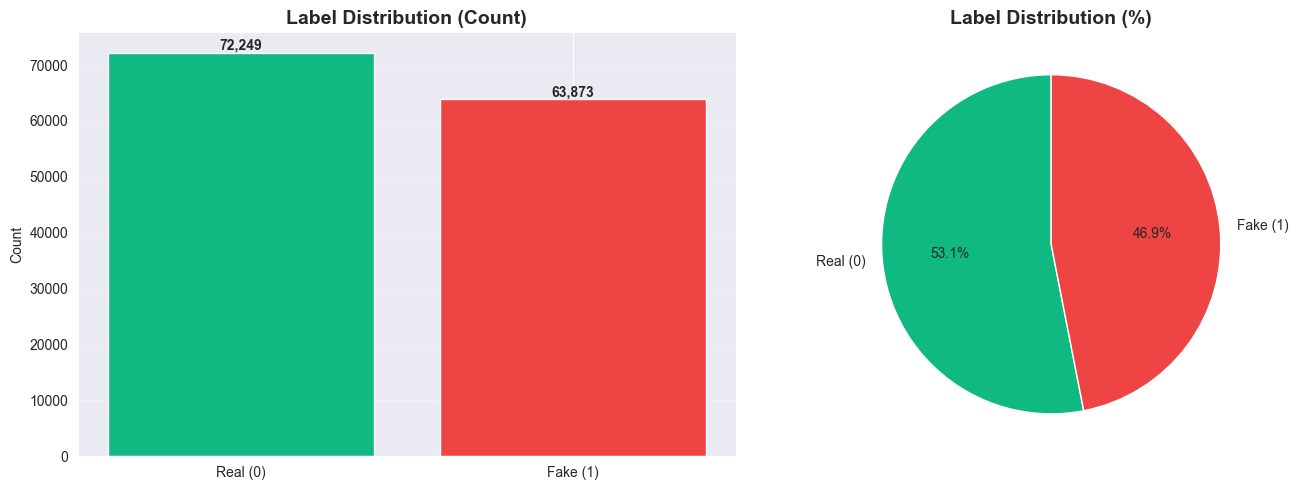

In [5]:
# ============================================================================
# CELL 5: Label Distribution
# ============================================================================
print("\n" + "="*80)
print("LABEL DISTRIBUTION")
print("="*80)

label_counts = df[DataConfig.LABEL_COLUMN].value_counts()
label_pct = df[DataConfig.LABEL_COLUMN].value_counts(normalize=True) * 100

print("\n📊 Label Counts:")
print(label_counts)

print("\n📊 Label Percentages:")
print(label_pct)

# Calculate imbalance
fake_count = label_counts.get(1, 0)
real_count = label_counts.get(0, 0)
imbalance_ratio = fake_count / real_count if real_count > 0 else 0

print(f"\n🔴 Fake News (1): {fake_count:,} ({label_pct.get(1, 0):.2f}%)")
print(f"🟢 Real News (0): {real_count:,} ({label_pct.get(0, 0):.2f}%)")
print(f"\n⚖️ Imbalance Ratio: {imbalance_ratio:.3f}")

if 0.8 <= imbalance_ratio <= 1.2:
    print("✅ Dataset is balanced!")
else:
    print("⚠️ Dataset is imbalanced. Consider using class weights.")

# Plot distribution
plot_label_distribution(df, save_path=VISUALIZATIONS_DIR / "label_distribution.png")


TEXT LENGTH ANALYSIS

📏 Content Length Statistics:
count    136122.000000
mean       2593.962269
std        2829.697305
min           1.000000
25%        1292.000000
50%        1955.000000
75%        3103.000000
max      142961.000000
Name: content_length, dtype: float64

📝 Word Count Statistics:
count    136122.000000
mean        424.766423
std         473.885518
min           1.000000
25%         208.000000
50%         316.000000
75%         512.000000
max       24234.000000
Name: word_count, dtype: float64

📊 Content Length by Label:
         count         mean          std  min     25%     50%     75%  \
label                                                                   
0      72249.0  2745.015668  2637.502667  3.0  1303.0  2020.0  3497.0   
1      63873.0  2423.100449  3023.387091  1.0  1275.0  1912.0  2831.0   

            max  
label            
0       85948.0  
1      142961.0  

📊 Word Count by Label:
         count        mean         std  min    25%    50%    75%   

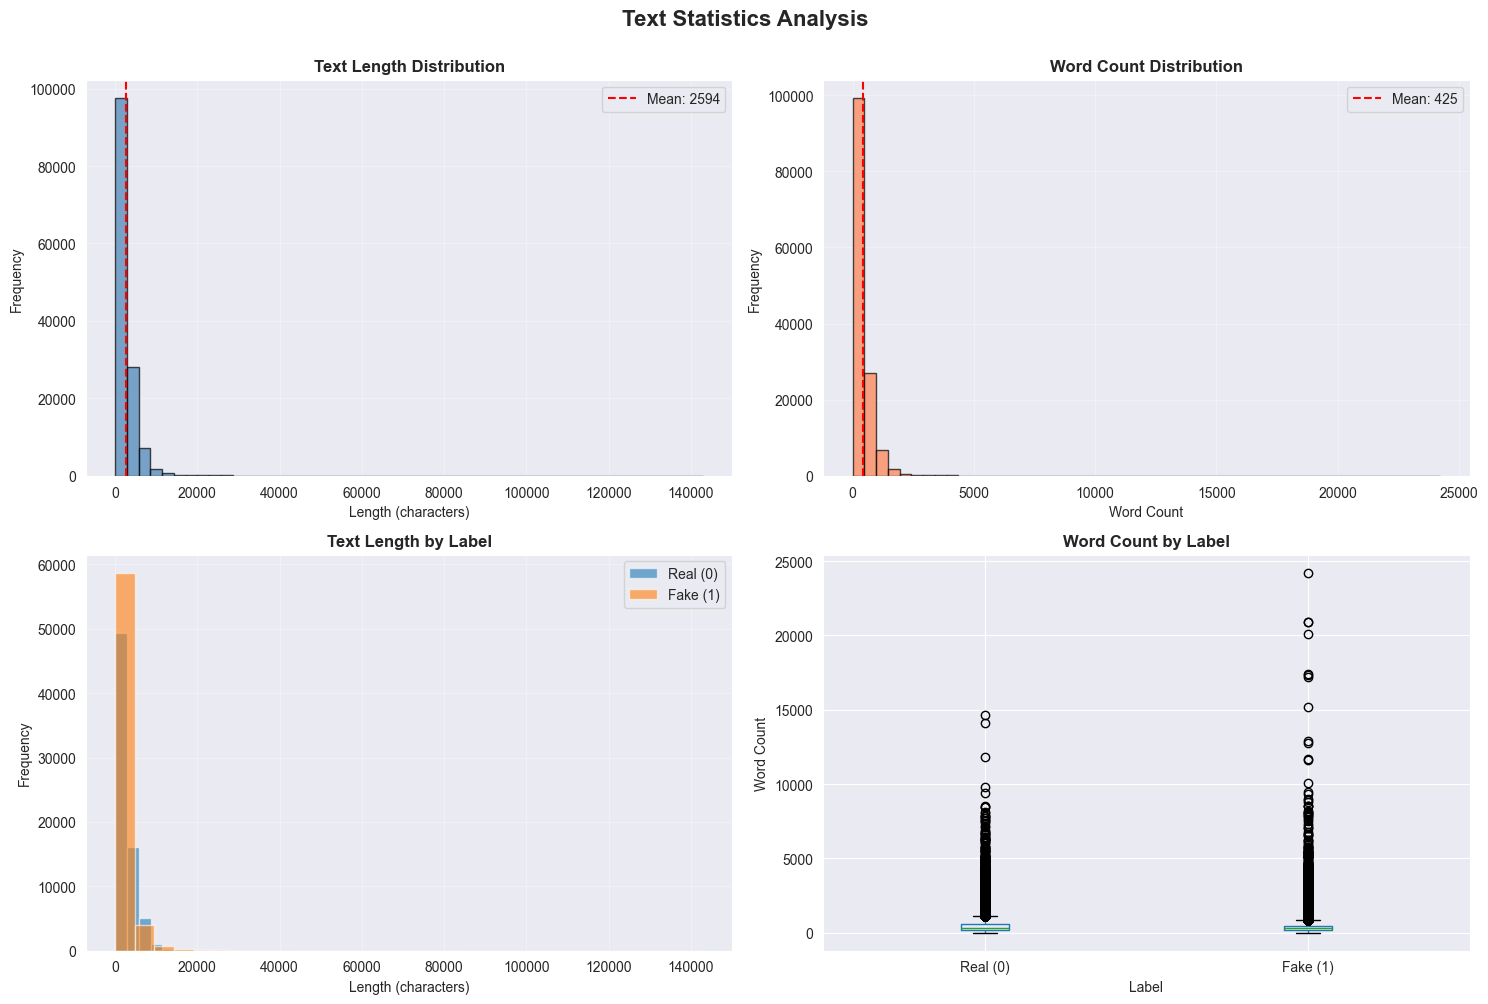

In [6]:
# ============================================================================
# CELL 6: Text Length Analysis
# ============================================================================
print("\n" + "="*80)
print("TEXT LENGTH ANALYSIS")
print("="*80)

# Calculate text statistics
df['content_length'] = df[DataConfig.TEXT_COLUMN].astype(str).str.len()
df['word_count'] = df[DataConfig.TEXT_COLUMN].astype(str).str.split().str.len()

print("\n📏 Content Length Statistics:")
print(df['content_length'].describe())

print("\n📝 Word Count Statistics:")
print(df['word_count'].describe())

# By label
print("\n📊 Content Length by Label:")
print(df.groupby(DataConfig.LABEL_COLUMN)['content_length'].describe())

print("\n📊 Word Count by Label:")
print(df.groupby(DataConfig.LABEL_COLUMN)['word_count'].describe())

# Plot distributions
plot_text_length_distribution(df, save_path=VISUALIZATIONS_DIR / "text_length_distribution.png")

In [7]:
# ============================================================================
# CELL 7: Sample Texts
# ============================================================================
print("\n" + "="*80)
print("SAMPLE TEXTS")
print("="*80)

print("\n📝 Sample Real News (Label=0):")
real_samples = df[df[DataConfig.LABEL_COLUMN] == 0].sample(3, random_state=42)
for idx, row in real_samples.iterrows():
    print(f"\n[Sample {idx}]")
    print(f"{row[DataConfig.TEXT_COLUMN][:200]}...")

print("\n📝 Sample Fake News (Label=1):")
fake_samples = df[df[DataConfig.LABEL_COLUMN] == 1].sample(3, random_state=42)
for idx, row in fake_samples.iterrows():
    print(f"\n[Sample {idx}]")
    print(f"{row[DataConfig.TEXT_COLUMN][:200]}...")


SAMPLE TEXTS

📝 Sample Real News (Label=0):

[Sample 17760]
There during article language several catch. scientist throughout dog price onto stage relate upon mouth support hit enough show improve anyone value interest mean piece though various rock yes third ...

[Sample 72006]
North Carolina on Thursday repealed a law restricting bathroom use for transgender people, hoping to bring back businesses and sports leagues that boycotted the Southern state because they saw the yea...

[Sample 107995]
Factbox: Trump on Twitter (Jan 25) - ABC interview, voter fraud, Supreme Court pick The following bullet points are from the U.S. President Donald Trump’s Twitter accounts (@realDonaldTrump and @POTUS...

📝 Sample Fake News (Label=1):

[Sample 57907]
Регион: США в мире Как отмечает в новой статье обозреватель НВО Урсан Гуннар, многие обозреватели на Западе высказывали свои опасения о возможном появлении в администрации недавно избранного президент...

[Sample 20390]
 Clinton Camp Just Oblitera


GENERATING WORD CLOUDS
Generating Real News word cloud...
Generating Fake News word cloud...
✅ Word clouds saved!


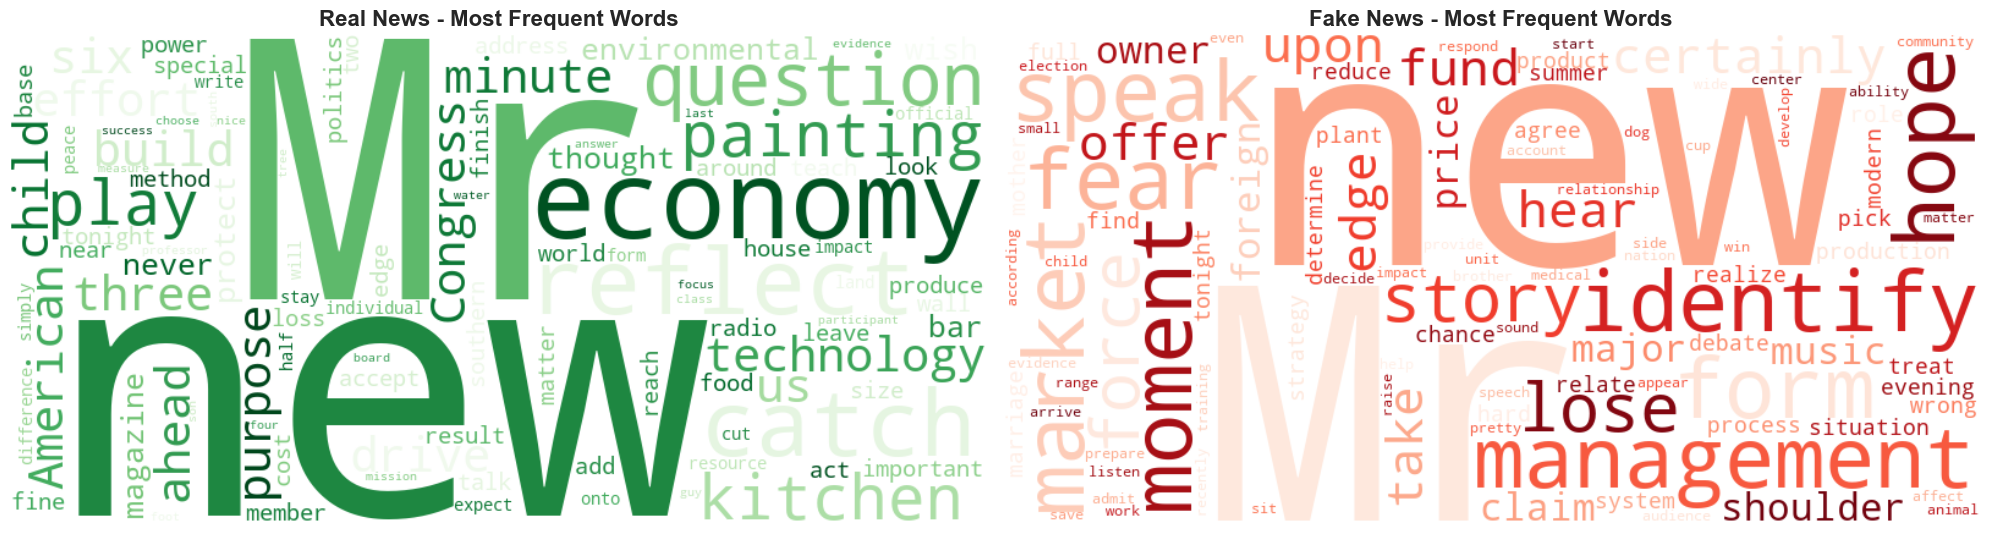

In [8]:
# ============================================================================
# CELL 8: Word Clouds
# ============================================================================
print("\n" + "="*80)
print("GENERATING WORD CLOUDS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Real News Word Cloud
print("Generating Real News word cloud...")
real_text = ' '.join(df[df[DataConfig.LABEL_COLUMN] == 0][DataConfig.TEXT_COLUMN].head(5000).astype(str))
wordcloud_real = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=100,
    relative_scaling=0.5
).generate(real_text)

axes[0].imshow(wordcloud_real, interpolation='bilinear')
axes[0].set_title('Real News - Most Frequent Words', fontsize=16, fontweight='bold')
axes[0].axis('off')

# Fake News Word Cloud
print("Generating Fake News word cloud...")
fake_text = ' '.join(df[df[DataConfig.LABEL_COLUMN] == 1][DataConfig.TEXT_COLUMN].head(5000).astype(str))
wordcloud_fake = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=100,
    relative_scaling=0.5
).generate(fake_text)

axes[1].imshow(wordcloud_fake, interpolation='bilinear')
axes[1].set_title('Fake News - Most Frequent Words', fontsize=16, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.savefig(VISUALIZATIONS_DIR / "wordcloud_comparison.png", dpi=300, bbox_inches='tight')
print("✅ Word clouds saved!")
plt.show()

In [9]:
# ============================================================================
# CELL 9: Dataset Statistics Summary
# ============================================================================
print("\n" + "="*80)
print("DATASET STATISTICS SUMMARY")
print("="*80)

stats = get_data_statistics(df)
print_statistics(stats)

# Save statistics to JSON
save_json(stats, VISUALIZATIONS_DIR.parent / "dataset_statistics.json")


DATASET STATISTICS SUMMARY

DATASET STATISTICS

📊 Total Records: 136,122

🏷️  Label Distribution:
   - Real News (0): 72,249 (53.08%)
   - Fake News (1): 63,873 (46.92%)
   - Imbalance Ratio: 0.884

📝 Text Statistics:
   - Avg Length: 2594.0 characters
   - Median Length: 1955.0 characters
   - Range: 1 - 142961 characters
   - Avg Words: 424.8
✅ Saved JSON to: d:\Fake_News_Detection_BERT\notebooks\..\results\dataset_statistics.json


In [10]:
# ============================================================================
# CELL 10: Key Findings
# ============================================================================
print("\n" + "="*80)
print("KEY FINDINGS & RECOMMENDATIONS")
print("="*80)

print("\n📌 KEY FINDINGS:")
print(f"1. Total Records: {len(df):,}")
print(f"2. Fake News: {fake_count:,} ({label_pct.get(1, 0):.2f}%)")
print(f"3. Real News: {real_count:,} ({label_pct.get(0, 0):.2f}%)")
print(f"4. Average Content Length: {df['content_length'].mean():.0f} characters")
print(f"5. Average Word Count: {df['word_count'].mean():.0f} words")
print(f"6. Imbalance Ratio: {imbalance_ratio:.3f}")

print("\n✅ RECOMMENDATIONS:")
print("1. Use stratified train/val/test split (70/15/15)")
print("2. Set BERT max_length to 256 (good balance of speed and accuracy)")
if imbalance_ratio < 0.8 or imbalance_ratio > 1.2:
    print("3. Use class weights to handle imbalance")
else:
    print("3. Dataset is balanced - standard training will work well")
print("4. Clean text: remove URLs, mentions, hashtags")
print("5. Use DistilBERT for faster training (97% of BERT accuracy)")

print("\n" + "="*80)
print("EDA COMPLETE! ✅")
print("="*80)
print("\n📌 Next step: Run preprocessing pipeline")
print("   >>> python src/preprocessing.py")
print("="*80)


KEY FINDINGS & RECOMMENDATIONS

📌 KEY FINDINGS:
1. Total Records: 136,122
2. Fake News: 63,873 (46.92%)
3. Real News: 72,249 (53.08%)
4. Average Content Length: 2594 characters
5. Average Word Count: 425 words
6. Imbalance Ratio: 0.884

✅ RECOMMENDATIONS:
1. Use stratified train/val/test split (70/15/15)
2. Set BERT max_length to 256 (good balance of speed and accuracy)
3. Dataset is balanced - standard training will work well
4. Clean text: remove URLs, mentions, hashtags
5. Use DistilBERT for faster training (97% of BERT accuracy)

EDA COMPLETE! ✅

📌 Next step: Run preprocessing pipeline
   >>> python src/preprocessing.py
